# Abalone Data Analysis

In [27]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd 
from sklearn import linear_model
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [22]:
df = pd.read_csv('Abalone_m.csv')
features = ['Length','Diameter','Height','WholeWeight','ShuckedWeight','VisceraWeight','ShellWeight']
X = df.loc[:,features].values
y = df.loc[:,['Rings']].values
X = StandardScaler().fit_transform(X)
pd.DataFrame(X, columns = features)

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight
0,-1.036303,-0.880482,-1.620461,-1.014948,-0.935042,-1.092100,-1.009007
1,-2.059060,-2.065731,-1.764168,-1.628220,-1.495763,-1.592650,-1.620669
2,-1.182411,-0.880482,-0.758222,-1.010697,-0.975414,-0.968154,-0.970778
3,-0.841492,-0.821219,-0.758222,-1.024514,-0.970928,-0.982456,-0.894321
4,-1.279817,-1.058269,-1.189342,-1.244527,-1.190731,-1.282785,-1.123694
...,...,...,...,...,...,...,...
1523,-0.110952,-0.110070,-0.614515,-0.323024,-0.526836,-0.191110,-0.317064
1524,-0.013546,-0.110070,0.104018,-0.263504,-0.147788,-0.415166,-0.404991
1525,0.278670,0.008455,-0.470808,-0.054120,0.027157,-0.009959,-0.164149
1526,0.376075,0.423292,1.541084,0.392283,0.415176,0.686044,0.199025


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [24]:
regr = linear_model.LinearRegression().fit(X_train, y_train)
regr.score(X_train,y_train)

0.4293722604958159

In [25]:
y_pred = regr.predict(X_test)

In [19]:
regr.score(X_test,y_test)

0.5178071604207324

In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

5.000014278029536

In [28]:
lr_list = [0.025,0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

C:\Users\Yves\Miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Learning rate:  0.025
Accuracy score (training): 0.308
Accuracy score (validation): 0.199


C:\Users\Yves\Miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Learning rate:  0.05
Accuracy score (training): 0.339
Accuracy score (validation): 0.176


C:\Users\Yves\Miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Learning rate:  0.075
Accuracy score (training): 0.379
Accuracy score (validation): 0.203


C:\Users\Yves\Miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Learning rate:  0.1
Accuracy score (training): 0.412
Accuracy score (validation): 0.219


C:\Users\Yves\Miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Learning rate:  0.25
Accuracy score (training): 0.449
Accuracy score (validation): 0.199


C:\Users\Yves\Miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Learning rate:  0.5
Accuracy score (training): 0.532
Accuracy score (validation): 0.196


C:\Users\Yves\Miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Learning rate:  0.75
Accuracy score (training): 0.020
Accuracy score (validation): 0.013


C:\Users\Yves\Miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Learning rate:  1
Accuracy score (training): 0.056
Accuracy score (validation): 0.069


In [50]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf
finalDf = pd.concat([principalDf, df[['Rings']]], axis = 1)
finalDf

,principal component 1,principal component 2,Rings
0,-2.854394,-0.524009,15
1,-4.621406,-0.287392,7
2,-2.554588,0.133460,10
3,-2.381740,0.156219,9
4,-3.163142,0.003037,10
...,...,...,...
1523,-0.820085,-0.168457,10
1524,-0.478028,0.242134,8
1525,-0.134358,-0.395154,10
1526,1.501210,0.776616,9


<AxesSubplot:title={'center':'2 component PCA'}, xlabel='Principal Component 1', ylabel='Principal Component 2'>

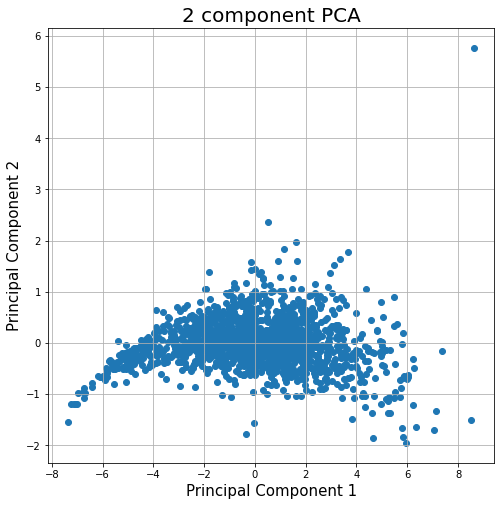

In [39]:
X = principalDf.values
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(X[:,0],X[:,1])
ax.grid()
ax

In [69]:
a = 0
b = 0
c = 0
d = []
for index, row in finalDf.iterrows():
    row['Rings']
    if row['Rings'] <=8:
        d.append("a")
    elif row['Rings'] <= 10:
        d.append("b")
    else:
        d.append("c")
print(a,b,c)
print(len(d))

0 0 0
1528


In [70]:
finalDf["type"] = d
finalDf

,principal component 1,principal component 2,Rings,type
0,-2.854394,-0.524009,15,c
1,-4.621406,-0.287392,7,a
2,-2.554588,0.133460,10,b
3,-2.381740,0.156219,9,b
4,-3.163142,0.003037,10,b
...,...,...,...,...
1523,-0.820085,-0.168457,10,b
1524,-0.478028,0.242134,8,a
1525,-0.134358,-0.395154,10,b
1526,1.501210,0.776616,9,b


<AxesSubplot:title={'center':'2 component PCA'}, xlabel='Principal Component 1', ylabel='Principal Component 2'>

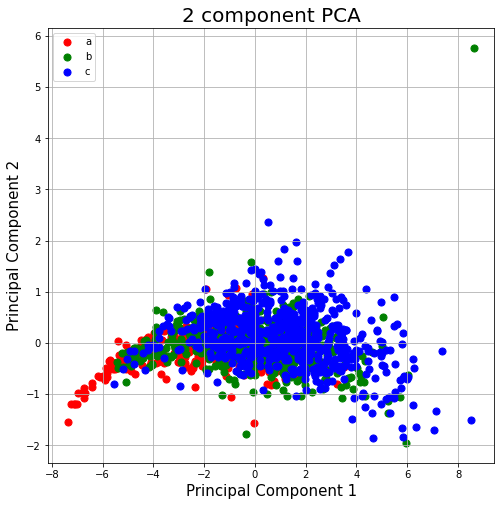

In [71]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['a','b','c']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['type'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
ax

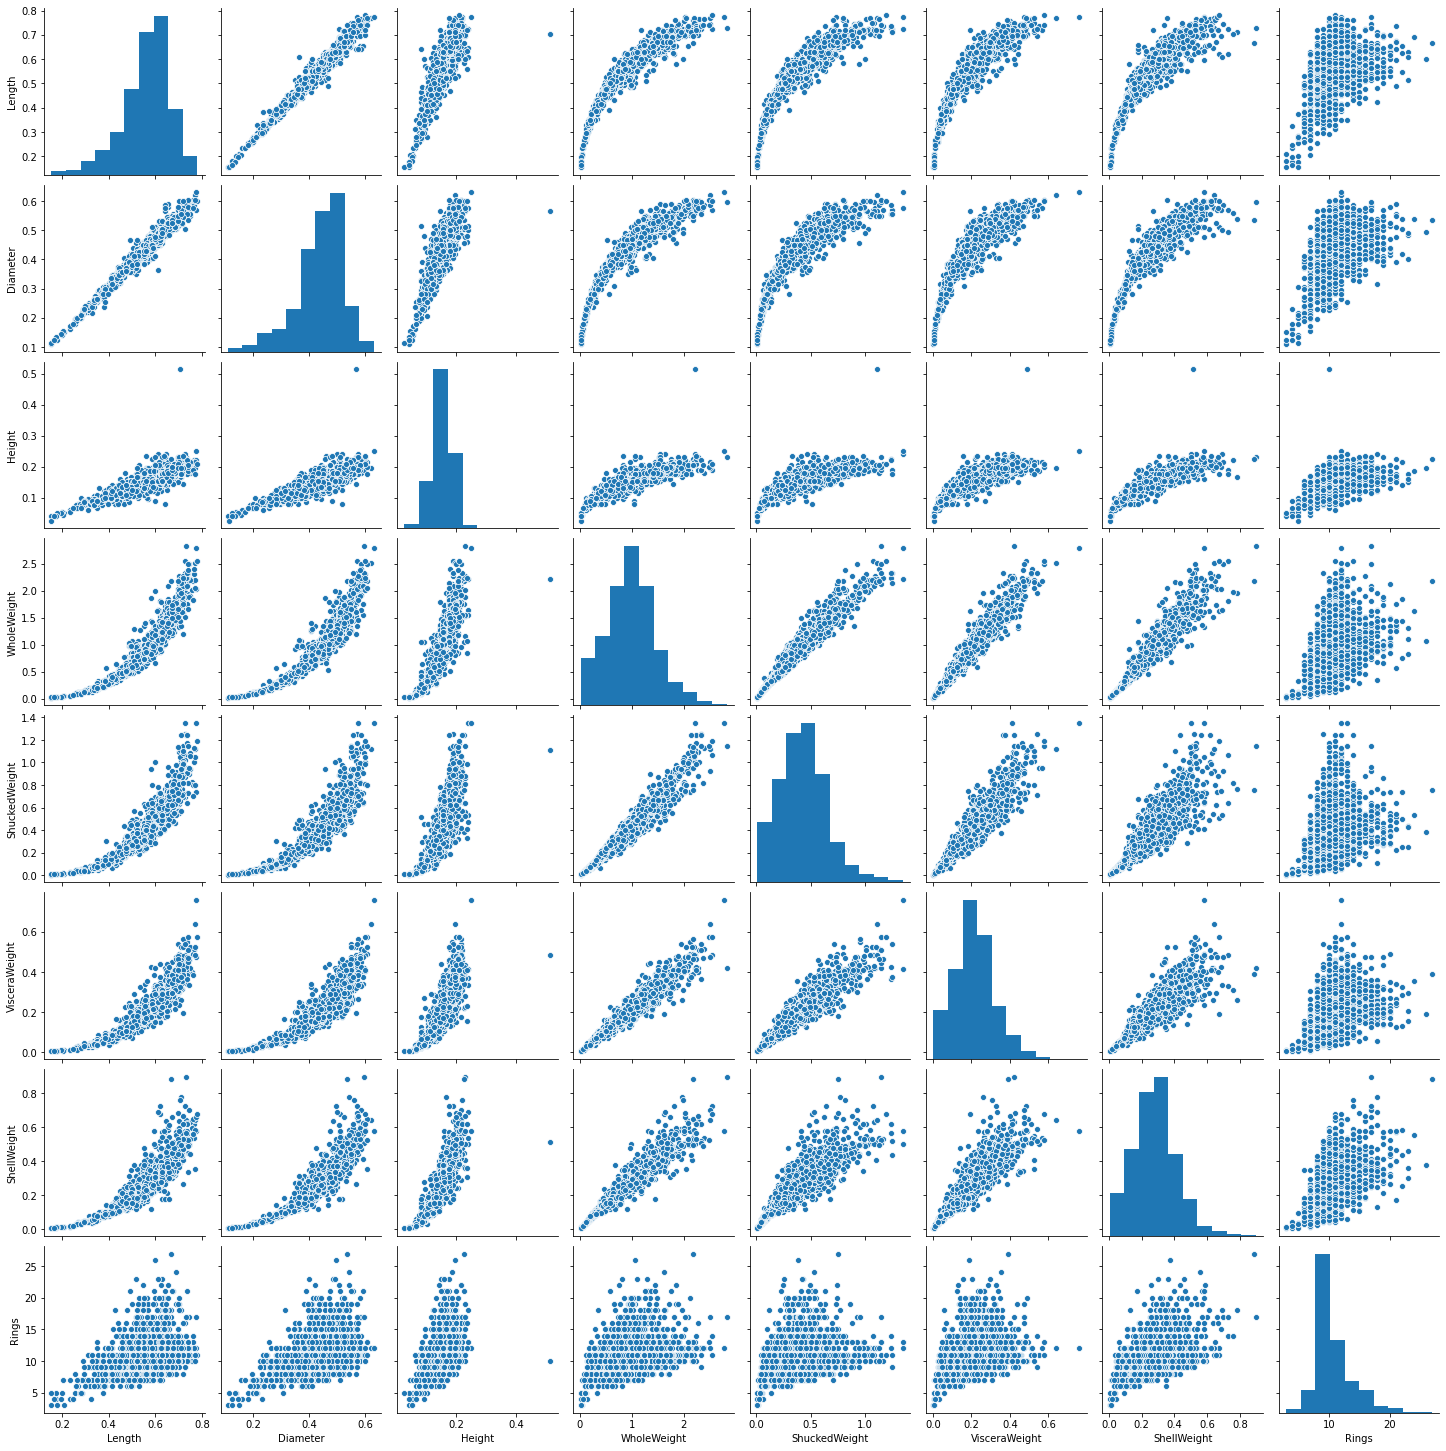

In [68]:
sns.pairplot(df)